<a href="https://colab.research.google.com/github/Amirrahman19/DeepLearning/blob/main/%5BCYS%5D_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="table table-bordered">
    <tr>
        <th style="text-align:center;"><h3>Linear Regression - Housing</h3>
    </tr>
</table>

**About the Data :** <br>
This is a dataset containing sales transactions of houses in the US.<br>

The data contains the following columns:
- 'Avg. Area Income': Average income of residents of the area the house is located in.
- 'Avg. Area House Age': Average age of houses in same area.
- 'Avg. Area Number of Rooms': Average number of rooms for houses in same area.
- 'Avg. Area Number of Bedrooms': Average number of bedrooms for houses in same area.
- 'Area Population': Population of the area the house is located in.
- 'Price': Price that the house sold at.
- 'Address': Address for the house.

**Objective of the study:**<br>
The objective of the study is to use `linear regression` to obtain a model for predicting the <b>sale price</b> of a house. Later on, a housing estate agent can use that model to predict the sale price of the properties he/she will have to sell.

<b>This notebook covers the following :</b> <br>
1. Reading the `housing` dataset and performing EDA
2. Preparing the data into `train` and `test` datasets
3. Fitting the Linear Regression model
4. Evaluating the trained model using statistics <b>[Out of Scope]</b>
5. Checking the assumptions of Linear Regression using the residual plots  <b>[Out of Scope]</b>
6. Evaluating the Linear Regression model against the test dataset

## 1. Reading and understanding the `housing` dataset

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Reading dataset from CSV
housing = pd.read_csv('housing_data.csv')

# Show dimensions (number of rows and columns) of dataset
print(housing.shape)

(5000, 7)


In [ ]:
# Show first 5 rows of dataset
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
# Show statistics of all numeric variables, rounded to 2 decimal places
round(housing.describe(),2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,68583.11,5.98,6.99,3.98,36163.52,1232072.65
std,10657.99,0.99,1.01,1.23,9925.65,353117.63
min,17796.63,2.64,3.24,2.00,172.61,15938.66
25%,61480.56,5.32,6.30,3.14,29403.93,997577.14
50%,68804.29,5.97,7.00,4.05,36199.41,1232669.38
75%,75783.34,6.65,7.67,4.49,42861.29,1471210.20
max,107701.75,9.52,10.76,6.50,69621.71,2469065.59


In [ ]:
# Show information about dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


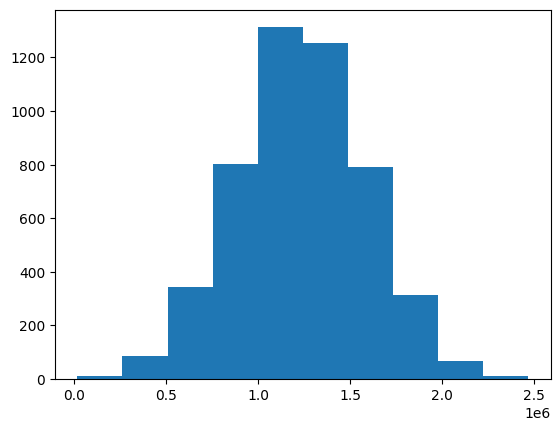

In [ ]:
# Show histogram of 'price' variable
plt.hist(housing['Price'])
plt.show()

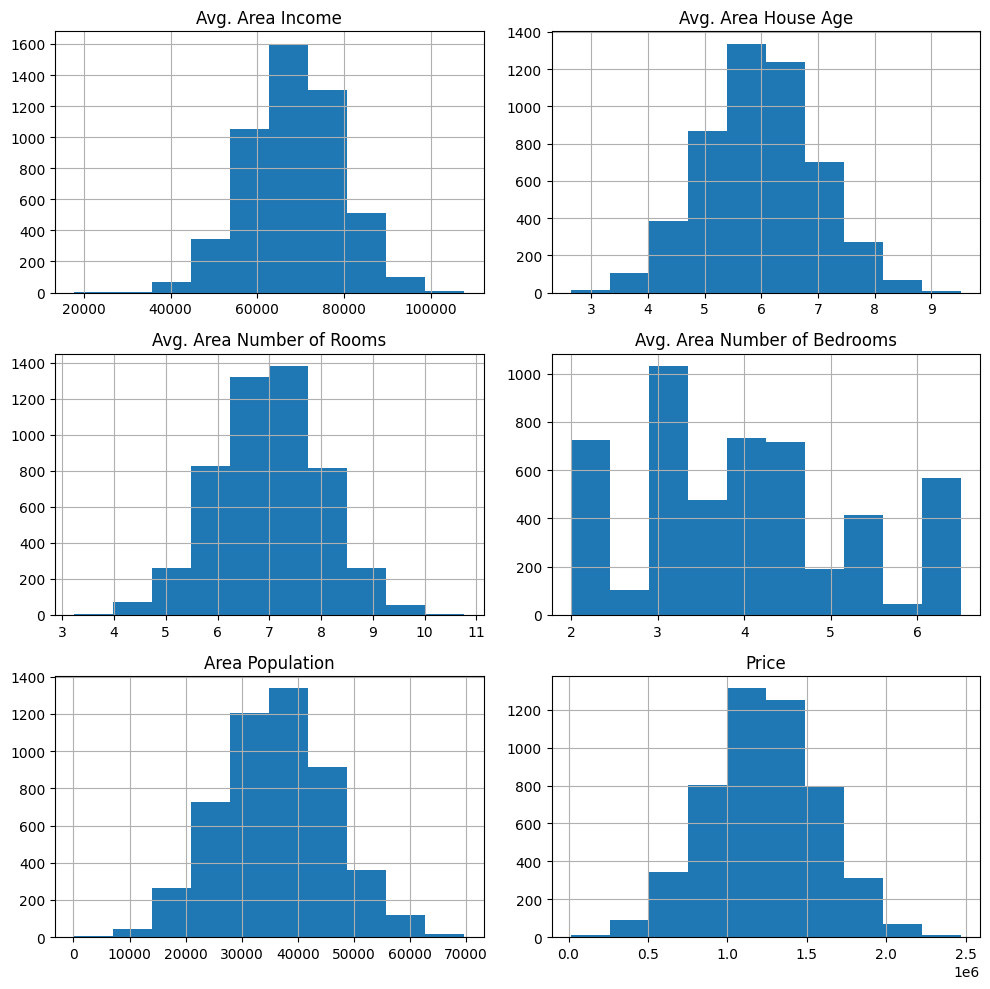

In [ ]:
# Show histogram of all numeric variables
housing.hist(figsize = (10,10))
plt.tight_layout()

## 2. Preparing the data for Linear Regression Modeling

### Creating X (predictor variables) and y (target variable) separately

In [ ]:
# Create predictor variables.
X = housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]

# Create target variable separately.
y = housing['Price']

### Separating the dataset into train and test

We will use the `train_test_split()` function from `scikit-learn` library to split the dataset into 2 parts: the `train` dataset and the `test` dataset.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Get ready to use library to split dataset
from sklearn.model_selection import train_test_split

# Split dataset into training and test sets,
# with each of these separating the predictor and target variables.
# "test_size = 0.2" means 20% of the dataset will be the test set.
# As before, we choose a random_state so that each time we run the code,
# it will generate random numbers in the same way, so that we will have
# repeatable results and a fair comparison between models.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
# Show first 5 rows of predictor variables of training set
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3413,69048.78809,6.619712,6.123813,4.33,36817.36876
1610,67866.89993,5.393978,9.359022,5.44,43122.57418
3459,56636.23819,5.497667,7.121872,6.10,47541.43176
4293,79310.36198,4.247434,7.518204,4.38,43982.18896
1039,72821.24766,6.480819,7.116655,5.33,40594.05930


In [ ]:
# Show first 5 rows of target variable of training set
y_train.head()

,Price
3413,1305210.265
1610,1400961.279
3459,1048639.789
4293,1231157.255
1039,1391232.527


## 3. Fitting the Linear Regression Model

For that we will need to use the `LinearRegression` module from `scikit-learn` library.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# Get ready to use library for linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
# Create LinearRegression object, which will do linear regression
lm = LinearRegression()

In [ ]:
# Give the training data to the linear regression model
lm.fit(X_train, y_train)

LinearRegression()

Now that we have run the linear regression, what are the parameters of the linear regression equation?

In [ ]:
# Show y-intercept of linear regression model
lm.intercept_

-2640441.39978007

In [ ]:
# Show coefficients of linear regression model
lm.coef_

array([2.15666957e+01, 1.65453042e+05, 1.20499839e+05, 1.99978534e+03,
       1.53406038e+01])

In [ ]:
# Show dimensions (number of rows and columns) of data structure storing the coefficients
lm.coef_.shape

(5,)

In [ ]:
# Create a DataFrame to store the coefficients
pd.DataFrame(lm.coef_, columns=['Coefficients'])

,Coefficients
0,21.566696
1,165453.042478
2,120499.839093
3,1999.785336
4,15.340604


In [ ]:
# Show dimensions (number of rows and columns) of the column names of predictor variables
X.columns.shape

(5,)

In [ ]:
# Create a DataFrame to show the coefficients, rounded to 2 decimal places
pd.DataFrame(lm.coef_,X.columns, columns=['Coefficients']).round(2)

,Coefficients
Avg. Area Income,21.57
Avg. Area House Age,165453.04
Avg. Area Number of Rooms,120499.84
Avg. Area Number of Bedrooms,1999.79
Area Population,15.34


Linear Regression Equation:

y_pred (Price) =  21.57*[Avg. Area Income] + 165453.04*[Avg. Area House Age] + 120499.84*[Avg. Area Number of Rooms] + 1999.79*[Avg. Area Number of Bedrooms] + 15.34*[Area Population] - 2640441.3997807647

## 4. Evaluation of the trained model using statistics [Out of Scope]

### a. Variables Significance - Get the `p` values of the t-tests to check for significance

In order to get the `p` values of the linear regression model we use the `statsmodels` library.
https://www.statsmodels.org/stable/regression.html

In [ ]:
# Import library to perform statistical evaluation
import statsmodels.api as sm

We will use OLS (means Ordinary Least Squares)
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

The `fit()` function will do the full fit of the model and the results contain an estimate of the covariance matrix or `residuals`.

In [ ]:
# Build a statistical model that will evalute the linear regression model using statistics
# Building a model to see how good the model we built is
x_train = sm.add_constant(X_train)
model = sm.OLS(y_train, x_train)
model_results = model.fit()

https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults

In [ ]:
# Show p-values for each predictor variable, rounded to 4 decimal places.
# The p-values for each predictor represent the probability of doubt of that predictor variable's usefulness
# in helping to predict the target variable
p_values = model_results.summary2().tables[1]['P>|t|']
round(p_values,4)

,P>|t|
const,0.0000
Avg. Area Income,0.0000
Avg. Area House Age,0.0000
Avg. Area Number of Rooms,0.0000
Avg. Area Number of Bedrooms,0.1731
Area Population,0.0000


Are all the variables significant at <b>5%</b> significance level?

No, because the p-value of "Avg. Area Number of Bedrooms" is 0.1731, representing a 17.31% level of doubt that this variable is helping us to predict the target variable, which is more than the 5% significance level. This implies that the "Avg. Area Number of Bedrooms" predictor variable should not be used.

In [ ]:
p_values = model_results.summary2()
p_values

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Ordinary least squares
==================================================================================================
Model:                        OLS                        Adj. R-squared:               0.917      
Dependent Variable:           Price                      AIC:                          103566.6070
Date:                         2024-08-16 11:31           BIC:                          103604.3713
No. Observations:             4000                       Log-Likelihood:               -51777.    
Df Model:                     5                          F-statistic:                  8842.      
Df Residuals:                 3994                       Prob (F-statistic):           0.00       
R-squared:                    0.917                      Scale:                        1.0268e+10 
--------------------------------------------------------------------------------------------------
                                 Coef.      Std.Err.      t     P>|t|      [0.025        0.975]   
--------------------------------------------------------------------------------------------------
const                        -2640441.3998 19342.8289 -136.5075 0.0000 -2678364.1400 -2602518.6595
Avg. Area Income                   21.5667     0.1507  143.0750 0.0000       21.2712       21.8622
Avg. Area House Age            165453.0425  1627.6686  101.6503 0.0000   162261.9036   168644.1814
Avg. Area Number of Rooms      120499.8391  1810.3105   66.5631 0.0000   116950.6201   124049.0581
Avg. Area Number of Bedrooms     1999.7853  1467.7825    1.3625 0.1731     -877.8876     4877.4583
Area Population                    15.3406     0.1615   95.0128 0.0000       15.0241       15.6572
--------------------------------------------------------------------------------------------------
Omnibus:                          4.719                  Durbin-Watson:                     1.981 
Prob(Omnibus):                    0.094                  Jarque-Bera (JB):                  4.191 
Skew:                             0.004                  Prob(JB):                          0.123 
Kurtosis:                         2.842                  Condition No.:                     945310
==================================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+05. This might indicate                that there are
strong multicollinearity or other numerical                problems.
"""

Now R2 (or R squared) is called the <b>coefficient of determination</b> of the regression model. <br />
R2 measures the <b>proportion of the variance in the dependent variable that is predictable from the independent variable(s)</b>.<br />
https://en.wikipedia.org/wiki/Coefficient_of_determination

- The best possible score for R2 is 1.0 when the model predicts perfectly the actual result.
- A constant model that always predicts the expected value of y, disregarding the input features, would get a R2 score of 0.
- R2 can be negative if the model is arbitrarily worse than the actual result.

Is the R-squared value of the model considered good? <br>
It's a good model, because R-squared is 0.917, which is close to 1 (a model that perfectly predicts the actual result).

## 5. Checking the assumptions of Linear Regression using the residual plots [Out of Scope]

Now that the model is significant, we want to know if the model satisfies the assumptions of LR.

Assumptions of LR:<br /><br />
    a) The mean of y is linearly related to X<br />
    b) Errors have equal variance<br />
    c) Errors are normally distributed<br />
    d) Errors are independent<br />

### a. Checking linearity between y and X

How do you check that y is linearly related to X? <br> Hint: Think of the EDA plots.

- Create a scatterplot of x vs y, where x is each of the predictor variables, and y is the target variable. Then look at the graph to see if the points look like a straight line.
- Use Pearson's correlation test. However, you still need to plot the points because extreme outliers can greatly influence the correlation (r) value.

### b. Checking equal variance by checking residual plot

Let's apply the regression equation to each house in the `X_test` dataset or use the `predict()` function of the model.

In [ ]:
# Use the linear regression to predict the y-values for the x-values in the test set
y_pred = lm.predict(X_test)

In [ ]:
# Create a DataFrame of the points on the linear regression line
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head()

,Actual,Predicted
1718,1.251689e+06,1.257920e+06
2511,8.730483e+05,8.221124e+05
345,1.696978e+06,1.740669e+06
2521,1.063964e+06,9.724521e+05
54,9.487883e+05,9.934223e+05


In [ ]:
# Calculate the residuals,
# i.e. the differences in y-values between the actual points in the dataset, and the points on linear regression line
results['residuals'] = results['Actual'] - results['Predicted']
results.head()

,Actual,Predicted,residuals
1718,1.251689e+06,1.257920e+06,-6231.113243
2511,8.730483e+05,8.221124e+05,50935.900913
345,1.696978e+06,1.740669e+06,-43691.395695
2521,1.063964e+06,9.724521e+05,91512.158732
54,9.487883e+05,9.934223e+05,-44633.987599


Text(0, 0.5, 'residuals')

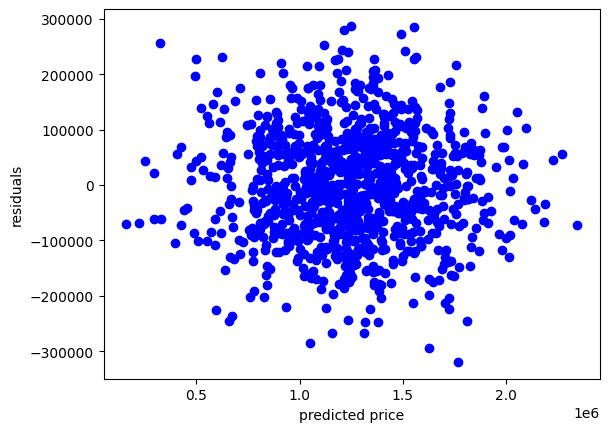

In [ ]:
# Create a scatter plot of predicted price (x-axis) vs residuals (y-axis)
plt.scatter(results['Predicted'], results['residuals'],  color='blue')
plt.xlabel("predicted price")
plt.ylabel("residuals")
# Pretty random, no violation

Note: Constant variance of error terms is also known as `homoscedasticity`. On the contrary, if there is unequal variance, it is called `heteroscedasticity`.


Note: <br />
A statistical test for determining homoscedasticity is use of the `White's Test`, proposed by Halbert White in 1980.

### c. Checking errors are normally distributed

(array([  5.,  18.,  60., 155., 217., 210., 194.,  89.,  37.,  15.]),
 array([-319277.05326602, -258621.02334745, -197964.99342888,
        -137308.96351031,  -76652.93359174,  -15996.90367316,
          44659.12624541,  105315.15616398,  165971.18608255,
         226627.21600112,  287283.24591969]),
 <BarContainer object of 10 artists>)

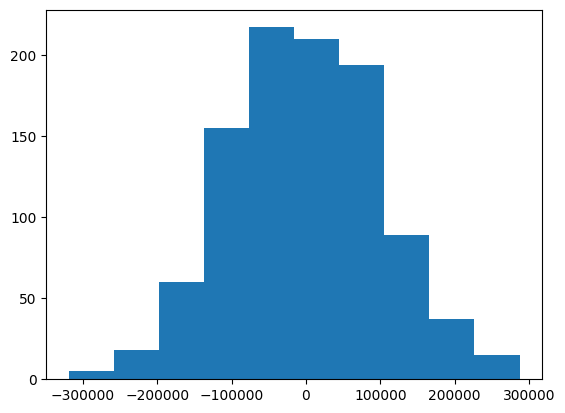

In [ ]:
# Show histogram of residuals
plt.hist(results['residuals'])

### d. Checking errors are independent (Multicollinearity)

A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.


A rule of thumb for interpreting the variance inflation factor:

* 1 = not correlated.
* Between 1 and 5 = moderately correlated.
* Greater than 5 = highly correlated.

In [ ]:
# Import libraries to test for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:
# Create a new dataset, which has the predictor variables in the training set, but with an added constant column.
# This is needed to calculate VIF in the next step.
X_train1 = sm.add_constant(X_train)
X_train1

,const,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3413,1.0,69048.78809,6.619712,6.123813,4.33,36817.36876
1610,1.0,67866.89993,5.393978,9.359022,5.44,43122.57418
3459,1.0,56636.23819,5.497667,7.121872,6.10,47541.43176
4293,1.0,79310.36198,4.247434,7.518204,4.38,43982.18896
1039,1.0,72821.24766,6.480819,7.116655,5.33,40594.05930
...,...,...,...,...,...,...
4171,1.0,56610.64256,4.846832,7.558137,3.29,25494.74030
599,1.0,70596.85095,6.548274,6.539986,3.10,51614.83014
1361,1.0,55621.89910,3.735942,6.868291,2.30,63184.61315
1547,1.0,63044.46010,5.935261,5.913454,4.10,32725.27954


In [ ]:
# For each column (variable) in the above DataFrame
for i in range(X_train1.shape[1]):

    # Calculate VIF for that variable
    v = vif(X_train1.values, i)

    # First column is constant
    if i == 0:
        print("VIF for intercept :", v)

    # All other columns contain predictor variables
    else:
        print("VIF for {} :{}".format(X_train1.columns[i],round(v,4)))

VIF for intercept : 145.75511073236655
VIF for Avg. Area Income :1.0008
VIF for Avg. Area House Age :1.0013
VIF for Avg. Area Number of Rooms :1.2737
VIF for Avg. Area Number of Bedrooms :1.2739
VIF for Area Population :1.0016


Do we need to drop any variables?

No, since all VIF values for all predictor variables (ignoring intercept) are very low, below 5, which means that none of the variables have high correlation with the other variables.

## 6. Evaluating the model against Test Dataset

### a) Using the Regression Model to Predict Prices with the Test Dataset

Now let's evaluate if the model obtained in section 3 is a good model. For that we will apply the model on the test dataset (`X_test`), and we will compare the actual result (`y_test`) with the result of the prediction model (`y_pred`).

Note: <br />
We could apply the regression equation to each house in the `X_test` dataset or use the `predict()` function of the model.

In [ ]:
# Use the linear regression model to predict y-values by giving the x-values in the test set
y_pred = lm.predict(X_test)

In [ ]:
# Show the data type of the returned result
type(y_pred)

numpy.ndarray

In [ ]:
# Show predictor variables of test set
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1718,66774.99582,5.717143,7.795215,4.32,36788.980330
2511,62184.53937,4.925758,7.427689,6.22,26008.309120
345,73643.05730,6.766853,8.337085,3.34,43152.139580
2521,61909.04144,6.228343,6.593138,4.29,28953.925380
54,72942.70506,4.786222,7.319886,6.41,24377.909050
...,...,...,...,...,...
3900,77615.85134,6.200603,6.909327,2.27,36591.523450
3753,66925.19935,5.153050,8.396903,3.16,42590.685170
3582,71778.02618,5.921280,7.411045,4.00,37634.041320
2392,87272.09339,5.025866,7.184765,5.39,7522.333138


In [ ]:
# Show predicted values of target variable from linear regression
y_pred

array([1257919.729243  ,  822112.41868746, 1740669.05869481,
        972452.12926797,  993422.26329869,  644126.07416923,
       1073911.79097568,  856584.00208541, 1445318.25527742,
       1204342.19071535, 1455792.46233212, 1298556.65691763,
       1735924.3385464 , 1336925.77593207, 1387637.43241546,
       1222403.7775789 ,  613786.28673715,  963933.54403078,
       1221197.33061283, 1198071.57580528,  505861.89541369,
       1769106.54726602, 1853881.16845508, 1200369.50514859,
       1065129.12845899, 1812033.73048173, 1768686.47104272,
       1439920.83823816, 1387251.99669638, 1541178.39227175,
        726418.805256  , 1754497.60914298, 1462185.72661611,
       1025600.16064318, 1284926.86862692,  917454.59581458,
       1187046.94951802,  999330.91123324, 1329536.63408985,
        782191.6043184 , 1393272.0305734 ,  578216.88372029,
        822643.37151087, 1895533.11423648, 1672019.84904555,
        966926.45430151, 1129674.55621679,  792797.75924278,
       1161057.1840407 ,

Preliminary comparison: Let's compare the first 5 predictions from `y_pred` and the actual values in `y_test` dataset manually.

In [ ]:
# Convert y_test (which is a Series) into an n-dimensional array (ndarray)
y_actual = y_test.to_numpy()

In [ ]:
# Show actual value, predicted value, and difference for first 5 rows in test set
for i in range(0,5):
    print('\nActual:   ' + str(round(y_actual[i])))
    print('Predict.: ' + str(round(y_pred[i])))
    print('Differ.:  ' + str(round(y_actual[i]-y_pred[i])))


Actual:   1251689
Predict.: 1257920
Differ.:  -6231

Actual:   873048
Predict.: 822112
Differ.:  50936

Actual:   1696978
Predict.: 1740669
Differ.:  -43691

Actual:   1063964
Predict.: 972452
Differ.:  91512

Actual:   948788
Predict.: 993422
Differ.:  -44634


### b) Visual evaluation using plotting

More generally, let's draw a scatter plot between `y_pred` and `y_test` to see close they are:

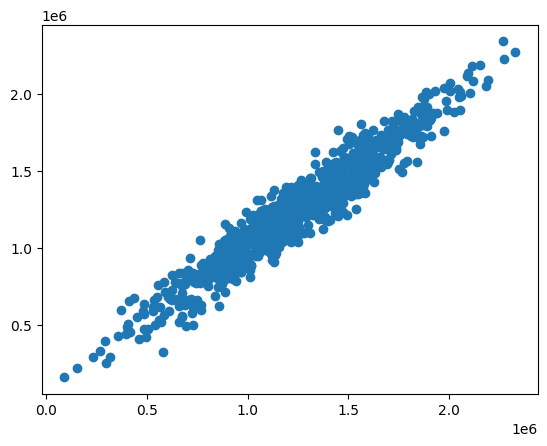

In [ ]:
# Show scatterplot of actual values (x-axis) vs predicted values (y-axis)
plt.scatter(y_test,y_pred)

Because this looks like the line "y = x", which means the predicted values are about the same as the actual values, so the model is predicting well.

### c) Quantitative evaluation using `RMSE` and `R-Square`

For this, we will use the `mean_squared_error` and `r2_score` libraries.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [ ]:
# Import libraries to use RMSE and r-squared metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate RMSE (a measure of how spread out the errors are)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

100499.6908303573

In statistics, the <b>mean squared error</b> (`MSE`) of an estimator measures the <b>average of the squares of the errors</b> that is, the average squared difference between the estimated values and the actual value.

Root Mean Square Error (`RMSE`) is the <b>standard deviation of the residuals</b> (prediction errors). Residuals are a measure of how far from the regression line data points are. <br />
`RMSE` is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [ ]:
# Show R-squared (a measure of how the linear regression model estimates the actual points in the dataset)
r_squared = r2_score(y_test, y_pred)
r_squared

0.9211719165553796